<a href="https://colab.research.google.com/github/BharathiVetukuri/CMPE-256_Asgn2_Feature-Engineering-Unstructured-Data/blob/main/FeatureEngUnstructuredData_NASA_Kepler_Star_KIC7671081B_Light_Curve_Waves_to_Sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install librosa
!pip3 install numba>=0.53

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import librosa
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "/content/578359main_kepler_star_KIC7671081B.mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(454054,) 22050


In [4]:
librosa.load(audio_data, sr=44100)

(array([ 1.5868711e-09,  6.4384622e-09, -6.2616473e-10, ...,
         4.0395800e-03,  3.1455609e-03,  0.0000000e+00], dtype=float32),
 44100)

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

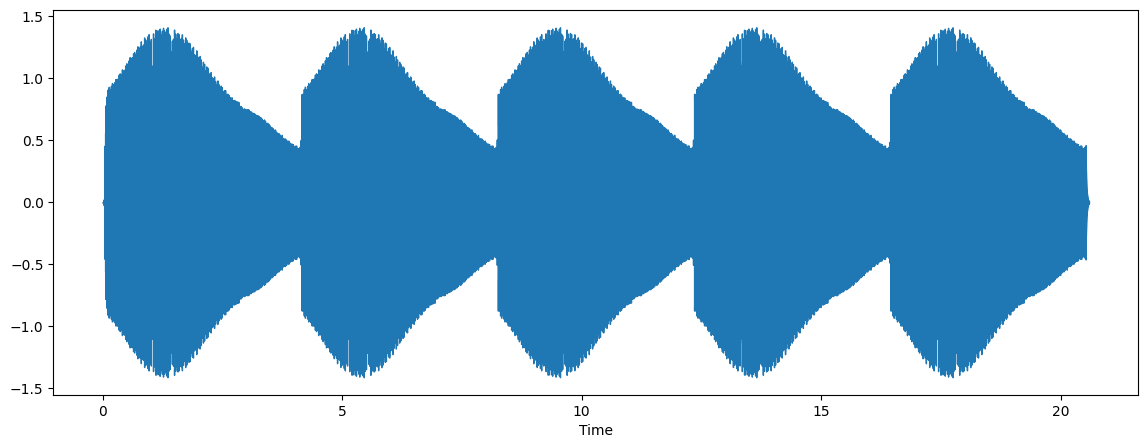

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

#**Short-time Fourier transform (STFT)**

In [7]:
#https://librosa.org/doc-playground/main/generated/librosa.feature.chroma_stft.html?highlight=ibrosa%20feature%20chroma_stft#librosa.feature.chroma_stft
#Energy
librosa.feature.chroma_stft(y=x, sr=sr)

array([[0.9867839 , 1.        , 0.8762513 , ..., 0.5884959 , 0.8497145 ,
        0.73142534],
       [0.96368575, 0.7598169 , 0.66604835, ..., 0.6421727 , 0.88295203,
        0.8241017 ],
       [0.91174287, 0.7144738 , 0.6736848 , ..., 0.72040635, 0.92830575,
        0.9043823 ],
       ...,
       [0.9525556 , 0.73937744, 0.59252226, ..., 0.44393927, 0.8629941 ,
        0.7807595 ],
       [0.93447566, 0.8572533 , 0.6153223 , ..., 0.4180444 , 0.8121715 ,
        0.7040912 ],
       [0.93840134, 0.9662837 , 0.7256244 , ..., 0.46458295, 0.77896094,
        0.6307637 ]], dtype=float32)

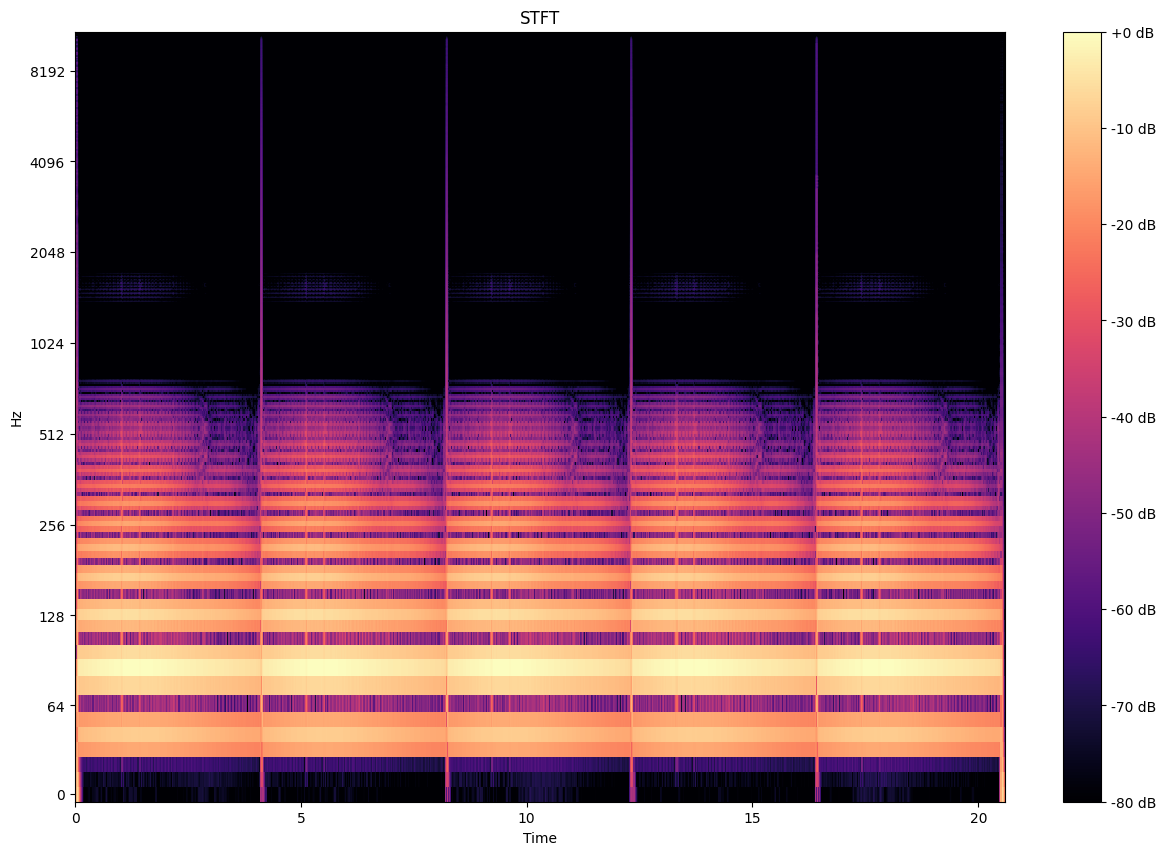

In [8]:
stft_result = librosa.stft(y=x)

stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()

#**MFCCs**

(20, 887)


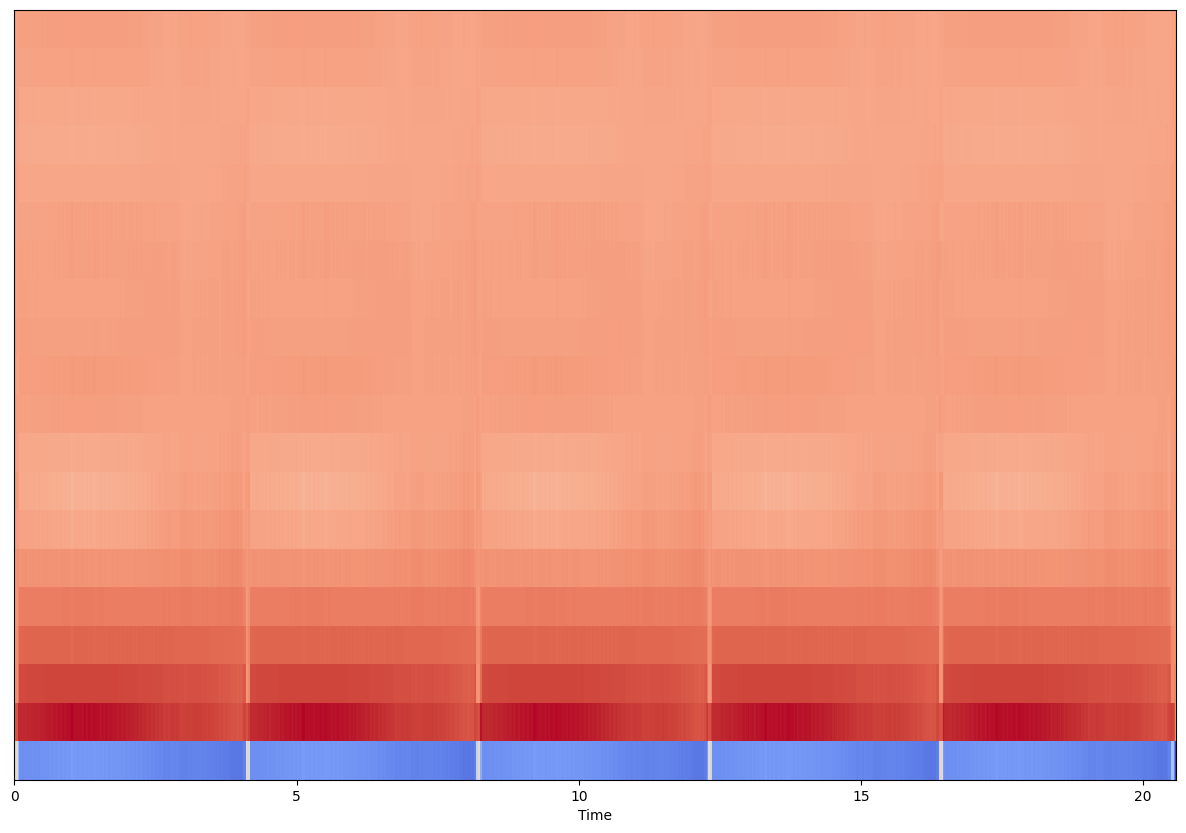

In [9]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [10]:
mfccs

array([[-2.8268515e+02, -1.3934024e+02, -1.4092224e+02, ...,
        -2.8372995e+02, -4.1264047e+02, -5.1073126e+02],
       [ 9.5203300e+01,  1.0751750e+02,  1.2354146e+02, ...,
         1.4129298e+02,  1.2017816e+02,  2.4750725e+01],
       [ 2.6922377e+01,  2.6851006e+01,  3.9010315e+01, ...,
         3.9757240e+01,  5.2412445e+01,  2.3922455e+01],
       ...,
       [ 3.5250516e+00,  3.3732011e+00,  1.0748355e+00, ...,
         4.1632071e+00,  3.6511812e+00,  7.4254713e+00],
       [ 3.3902544e-01,  6.3552678e-01, -1.1137210e+00, ...,
         2.3743567e+00,  3.9193110e+00,  7.2293868e+00],
       [ 3.4816461e+00,  3.7444582e+00,  2.0511558e+00, ...,
         1.5988388e+00,  1.8296604e+00,  6.9924335e+00]], dtype=float32)

In [11]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

(20, 887)


In [12]:
mfccs

array([[-2.8268515e+02, -1.3934024e+02, -1.4092224e+02, ...,
        -2.8372995e+02, -4.1264047e+02, -5.1073126e+02],
       [ 9.5203300e+01,  1.0751750e+02,  1.2354146e+02, ...,
         1.4129298e+02,  1.2017816e+02,  2.4750725e+01],
       [ 2.6922377e+01,  2.6851006e+01,  3.9010315e+01, ...,
         3.9757240e+01,  5.2412445e+01,  2.3922455e+01],
       ...,
       [ 3.5250516e+00,  3.3732011e+00,  1.0748355e+00, ...,
         4.1632071e+00,  3.6511812e+00,  7.4254713e+00],
       [ 3.3902544e-01,  6.3552678e-01, -1.1137210e+00, ...,
         2.3743567e+00,  3.9193110e+00,  7.2293868e+00],
       [ 3.4816461e+00,  3.7444582e+00,  2.0511558e+00, ...,
         1.5988388e+00,  1.8296604e+00,  6.9924335e+00]], dtype=float32)

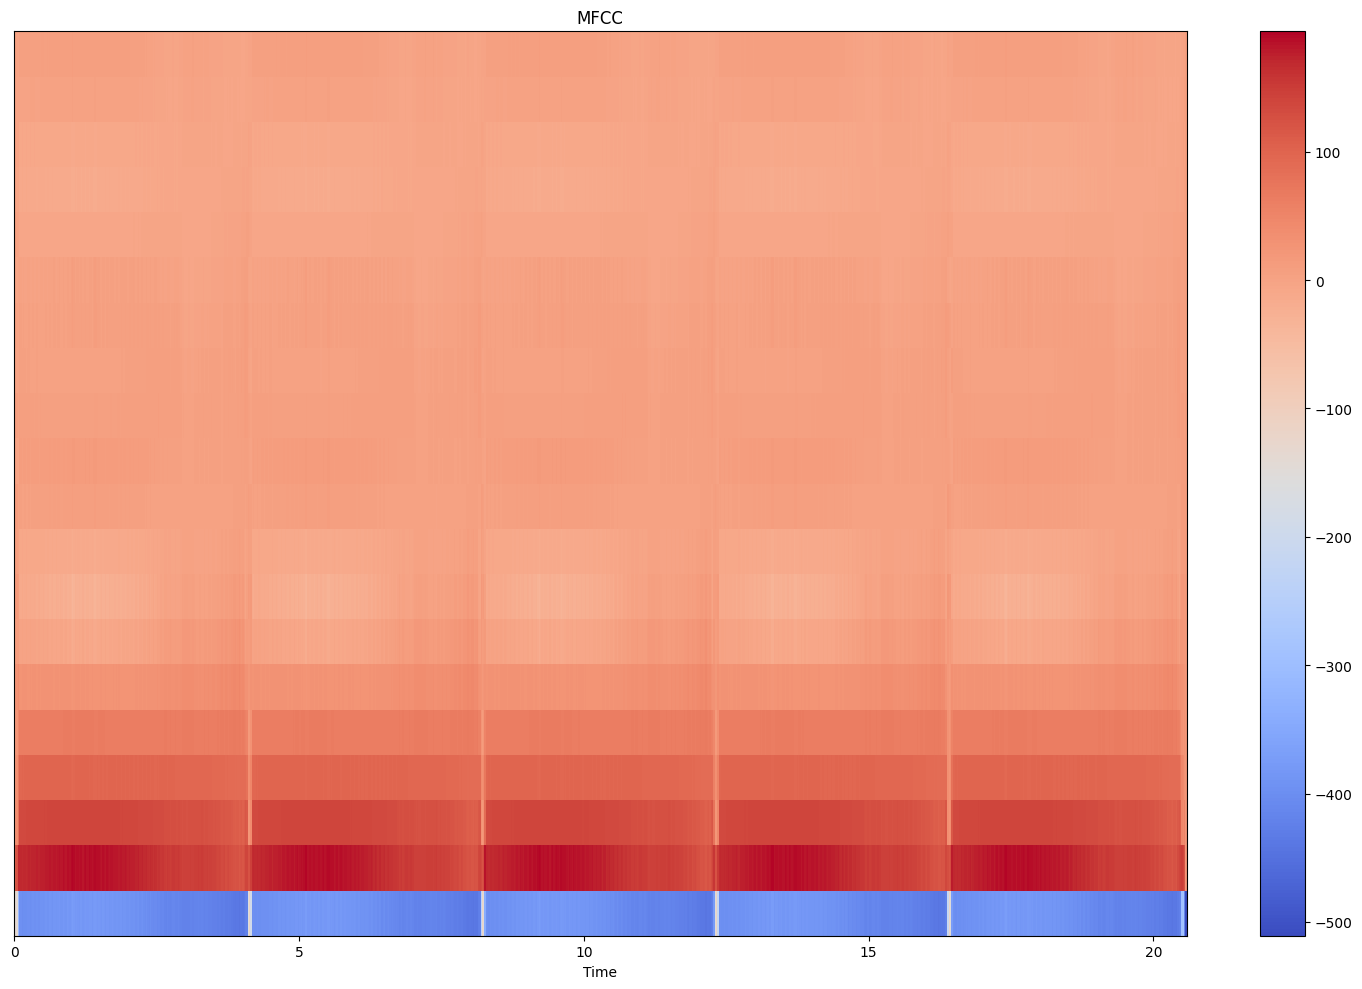

In [13]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

#**Spectrogram**

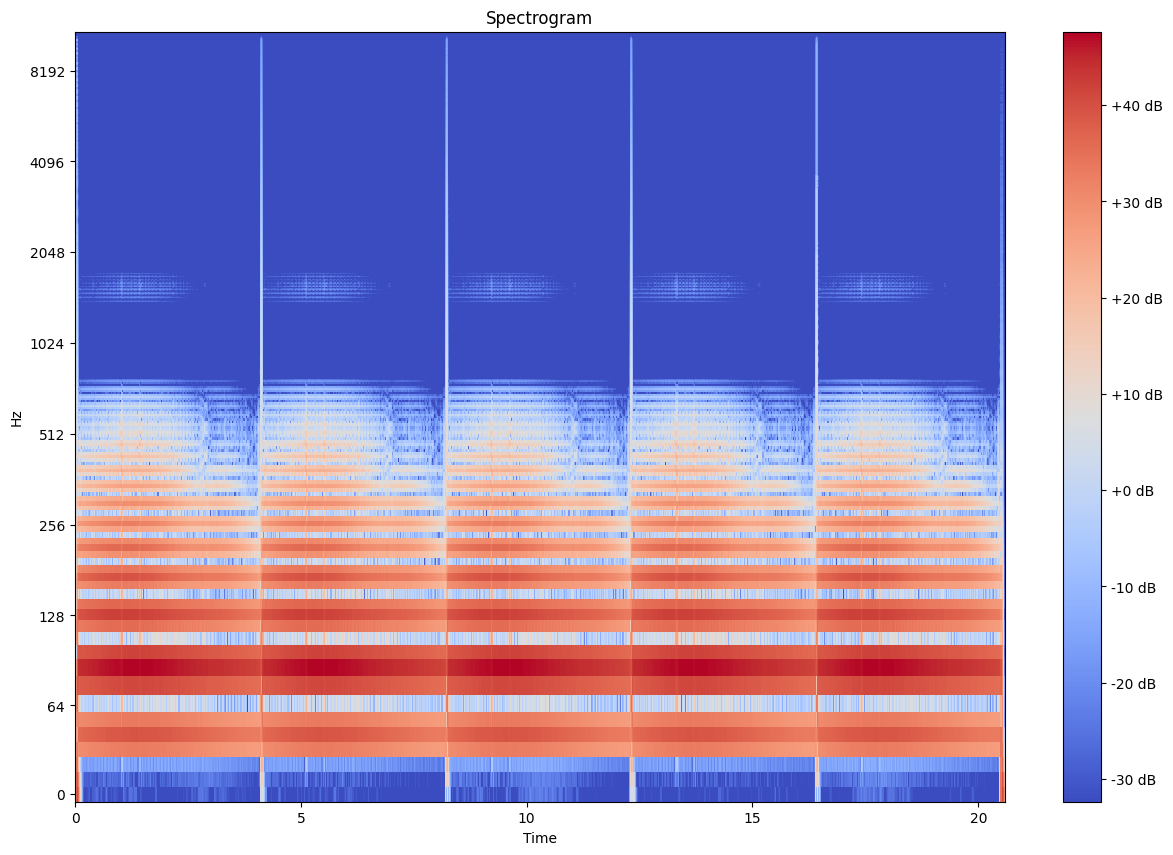

In [14]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [15]:
X

array([[-6.20459938e+00+0.0000000e+00j, -6.55151596e+01+0.0000000e+00j,
        -1.09399300e+02+0.0000000e+00j, ...,
         1.10935181e+02+0.0000000e+00j,  7.81137924e+01+0.0000000e+00j,
         2.03146420e+01+0.0000000e+00j],
       [-4.64952660e+00-4.0573130e+00j,  2.58454247e+01-5.4803360e+01j,
         8.62727585e+01+1.0571259e+01j, ...,
        -9.29501495e+01+1.1938703e+01j, -2.93133278e+01-4.4645023e+01j,
        -4.86949492e+00-1.2167308e+01j],
       [-7.39324868e-01-5.9643183e+00j,  2.84439964e+01+3.8711567e+01j,
        -3.93445511e+01-3.1390179e+01j, ...,
         6.56157074e+01-9.5853430e-01j, -1.92258072e+01+1.1084711e+01j,
        -3.48910356e+00+2.8890458e-01j],
       ...,
       [ 1.06356117e-06+2.5319864e-07j, -1.88507397e-06+1.1112594e-06j,
         5.36291452e-07-1.1980326e-06j, ...,
         4.07583684e-07-5.2715978e-07j,  2.58795853e-06-1.8060643e-06j,
        -5.86773822e-05+5.0043232e-05j],
       [-1.40728559e-07+4.4004688e-07j,  5.26882729e-07-7.3851299e-0

In [16]:
Xdb

array([[ 15.854275,  36.326836,  40.780293, ...,  40.901382,  37.854553,
         26.156185],
       [ 15.806956,  35.64831 ,  38.782196, ...,  39.436066,  34.552177,
         22.349102],
       [ 15.57744 ,  33.63169 ,  34.03693 , ...,  36.341084,  26.924084,
         10.883952],
       ...,
       [-32.36309 , -32.36309 , -32.36309 , ..., -32.36309 , -32.36309 ,
        -32.36309 ],
       [-32.36309 , -32.36309 , -32.36309 , ..., -32.36309 , -32.36309 ,
        -32.36309 ],
       [-32.36309 , -32.36309 , -32.36309 , ..., -32.36309 , -32.36309 ,
        -32.36309 ]], dtype=float32)

#**Chromagram**

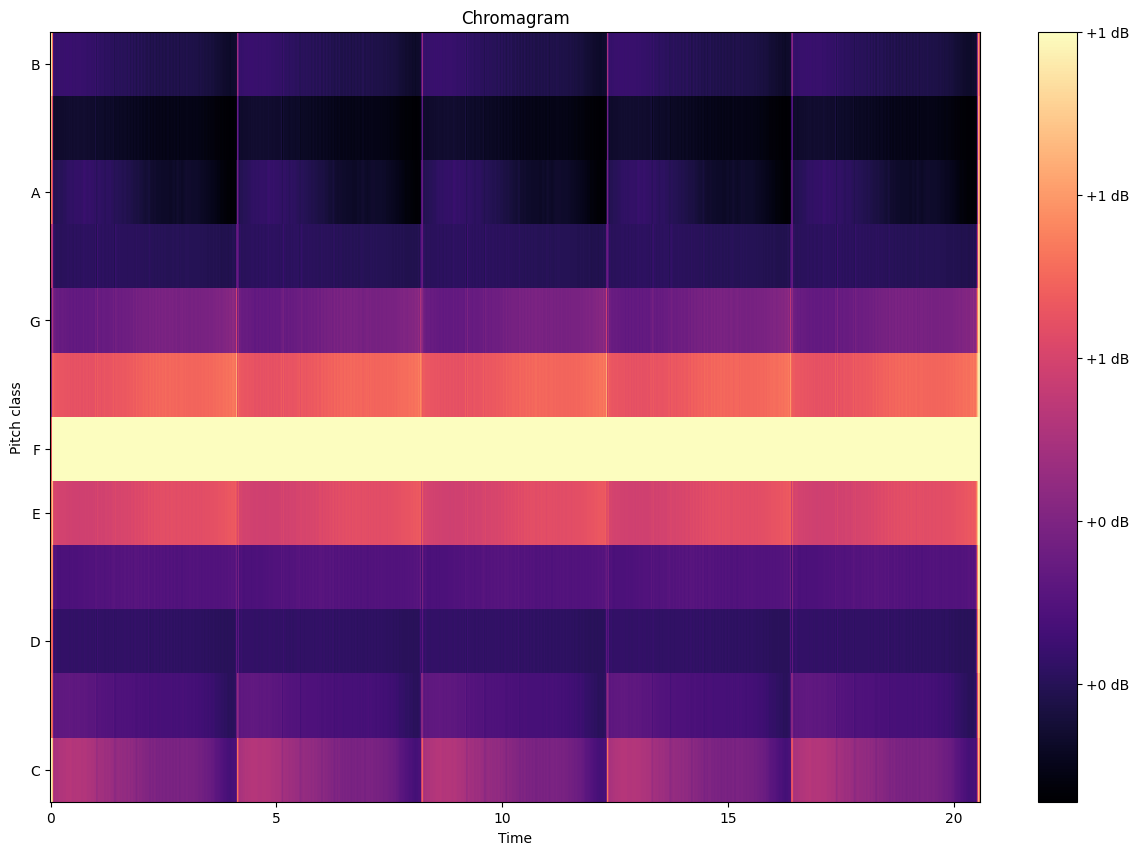

In [17]:
chroma_db = librosa.feature.chroma_stft(y=x, sr=sr)

plt.figure(figsize=(15, 10))
librosa.display.specshow(chroma_db, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Chromagram')
plt.show()

In [18]:
chroma_db

array([[0.9867839 , 1.        , 0.8762513 , ..., 0.5884959 , 0.8497145 ,
        0.73142534],
       [0.96368575, 0.7598169 , 0.66604835, ..., 0.6421727 , 0.88295203,
        0.8241017 ],
       [0.91174287, 0.7144738 , 0.6736848 , ..., 0.72040635, 0.92830575,
        0.9043823 ],
       ...,
       [0.9525556 , 0.73937744, 0.59252226, ..., 0.44393927, 0.8629941 ,
        0.7807595 ],
       [0.93447566, 0.8572533 , 0.6153223 , ..., 0.4180444 , 0.8121715 ,
        0.7040912 ],
       [0.93840134, 0.9662837 , 0.7256244 , ..., 0.46458295, 0.77896094,
        0.6307637 ]], dtype=float32)

#**Mel-Scaled Spectrogram**

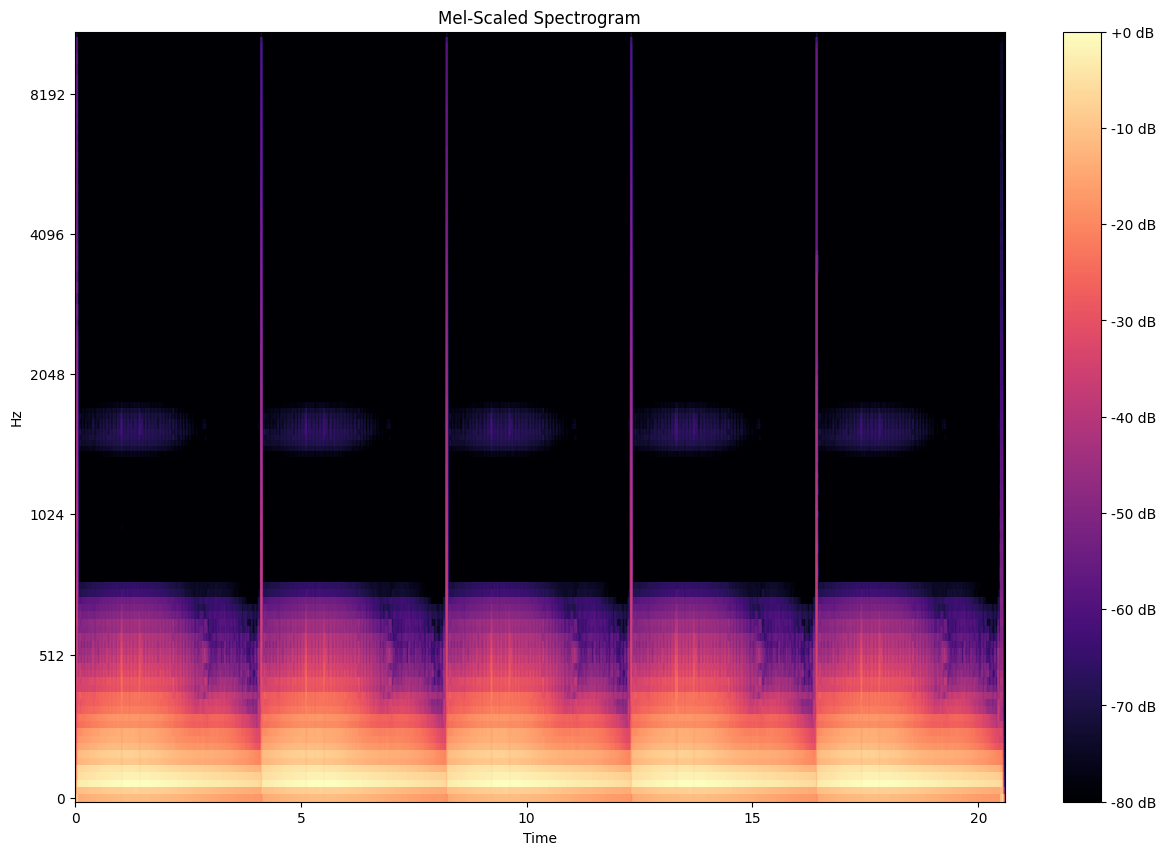

In [19]:
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)

mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Scaled Spectrogram')
plt.show()

In [20]:
mel_spectrogram

array([[3.1005678e+00, 1.6787233e+02, 2.7421564e+02, ..., 3.7780402e+02,
        6.7329681e+01, 3.2371197e+00],
       [2.4398332e+00, 7.3245728e+01, 1.8165628e+02, ..., 1.1273550e+02,
        5.8980527e+00, 3.2232378e-02],
       [1.4998144e+00, 8.9692009e+01, 6.3871106e+02, ..., 1.3245280e+02,
        2.6113515e+00, 2.4923563e-03],
       ...,
       [2.8026954e-04, 2.8882944e-03, 1.8809714e-03, ..., 7.7638062e-05,
        5.1866550e-06, 4.5728839e-08],
       [2.4088235e-04, 2.6738569e-03, 1.7950340e-03, ..., 4.6905385e-05,
        2.9931675e-06, 3.1168568e-08],
       [8.9026053e-06, 1.1012531e-04, 8.1002167e-05, ..., 3.9534734e-06,
        2.7607368e-07, 8.1924334e-09]], dtype=float32)

In [21]:
mel_spectrogram_db

array([[-28.378212 , -11.042833 ,  -8.911703 , ...,  -7.5199585,
        -15.010559 , -28.191038 ],
       [-29.419024 , -14.644802 , -10.700121 , ..., -12.772018 ,
        -25.585539 , -48.2097   ],
       [-31.53225  , -13.765087 ,  -5.23958  , ..., -12.072014 ,
        -29.123972 , -59.326523 ],
       ...,
       [-68.816864 , -58.68621  , -60.548805 , ..., -74.39188  ,
        -80.       , -80.       ],
       [-69.47458  , -59.021244 , -60.7519   , ..., -76.5804   ,
        -80.       , -80.       ],
       [-80.       , -72.87376  , -74.20766  , ..., -80.       ,
        -80.       , -80.       ]], dtype=float32)

#**Beat Tracker**

Exception ignored in: <function _on_type_disposal at 0x7d5141822050>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numba/core/types/abstract.py", line 28, in _on_type_disposal
    def _on_type_disposal(wr, _pop=_typecache.pop):
KeyboardInterrupt: 


Detected Tempo: [143.5546875] BPM


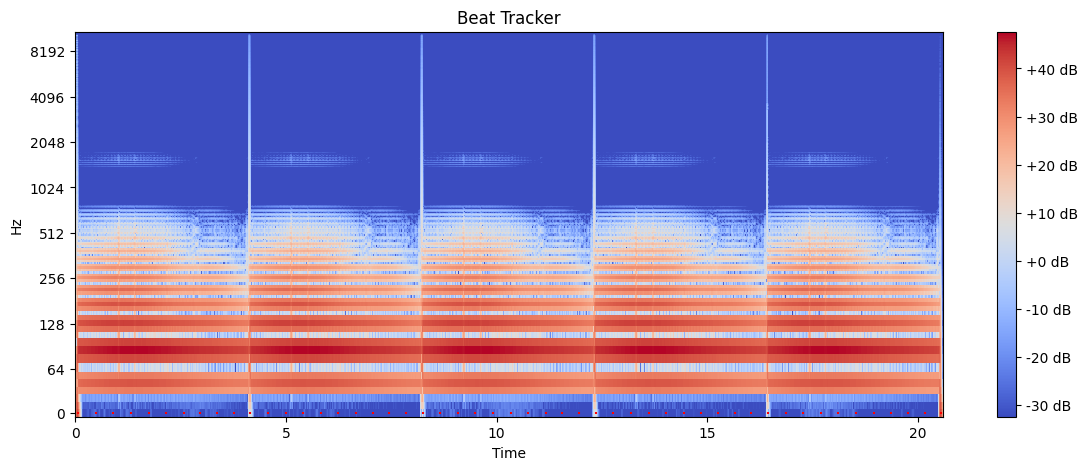

In [22]:
tempo, beats = librosa.beat.beat_track(y=x, sr=sr)

print(f"Detected Tempo: {tempo} BPM")

# Plot beat locations on the waveform
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.vlines(librosa.frames_to_time(beats, sr=sr), -1, 1, color='r')
plt.colorbar(format='%+2.0f dB')
plt.title('Beat Tracker')
plt.show()

#**Constant-Q Transform**

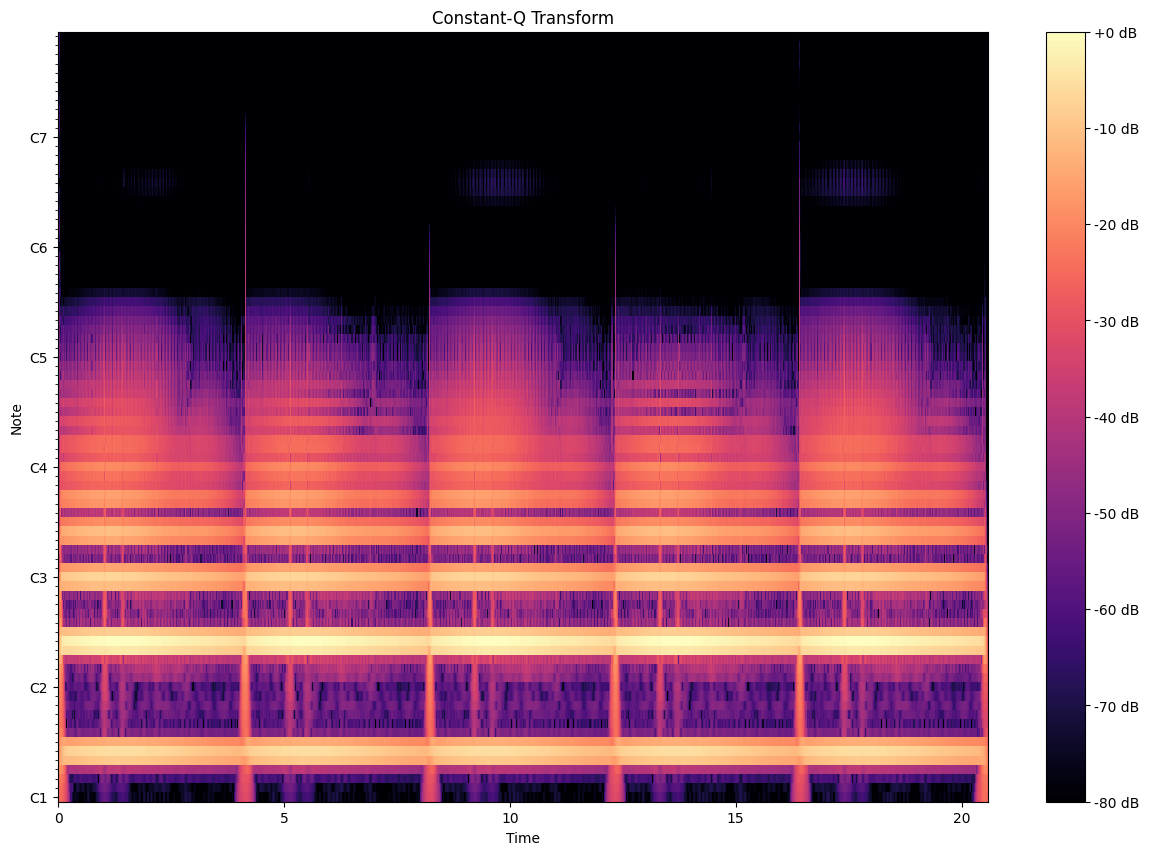

In [23]:
CQT = librosa.cqt(y=x, sr=sr)

CQT_db = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(CQT_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform')
plt.show()

In [24]:
CQT

array([[ 1.6586695e-02+8.1386924e-01j,  8.4540284e-01+3.9390434e-02j,
         9.8989673e-02-8.3908772e-01j, ...,
         8.7328577e-01+3.3297169e-01j,  3.7693512e-01-8.2642072e-01j,
        -7.4961007e-01-3.9779976e-01j],
       [ 4.0675339e-01+7.9300541e-01j,  9.3352050e-01-1.0717342e-01j,
         2.3394650e-01-9.1258317e-01j, ...,
         9.1257054e-01+3.9449120e-01j,  6.6450834e-01-6.9482774e-01j,
        -3.9162207e-01-7.9485041e-01j],
       [ 8.4750706e-01+6.0022813e-01j,  1.0303721e+00-3.1443244e-01j,
         3.7179053e-01-1.0146480e+00j, ...,
         9.7441489e-01+4.6771637e-01j,  9.3189383e-01-4.8402008e-01j,
         1.7074285e-01-9.6617961e-01j],
       ...,
       [ 3.8320611e-08+8.1171834e-09j,  2.8246196e-03-6.2962864e-03j,
        -5.7623318e-05+7.0751797e-05j, ...,
         6.2259071e-04-4.9656513e-04j, -4.7565859e-06+7.8482990e-06j,
        -9.2310103e-07+1.7508801e-06j],
       [ 5.5595052e-08-2.6709465e-08j, -4.6321857e-03-5.4420042e-03j,
         4.9726768e-05

In [25]:
CQT_db

array([[-25.410444, -25.072649, -25.087166, ..., -24.210722, -24.45853 ,
        -25.049051],
       [-24.623463, -24.163996, -24.141466, ..., -23.673977, -23.964945,
        -24.673786],
       [-23.29497 , -22.97676 , -22.949884, ..., -22.94801 , -23.198761,
        -23.78863 ],
       ...,
       [-80.      , -66.84529 , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -66.541466, -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -65.04318 , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)